**Nitheeswaran M 24BAD079**

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [38]:
import warnings
warnings.filterwarnings('ignore')

**Scenario 1**

In [39]:
df= pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [45]:
X = df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1)
y = df['average_score']

X = pd.get_dummies(X, drop_first=True)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics
Mean Squared Error (MSE): 179.60
Root Mean Squared Error (RMSE): 13.40
R² Score: 0.1622


In [49]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("Feature Influence (Coefficients)")
print(coef_df)

Feature Influence (Coefficients)
                                          Feature  Coefficient
10                                 lunch_standard     4.405985
4                          race/ethnicity_group E     2.068116
3                          race/ethnicity_group D     1.662529
5   parental level of education_bachelor's degree     1.129806
7     parental level of education_master's degree     0.454377
2                          race/ethnicity_group C     0.427839
1                          race/ethnicity_group B    -0.054856
8        parental level of education_some college    -0.357219
9    parental level of education_some high school    -1.254711
6         parental level of education_high school    -1.848668
0                                     gender_male    -2.044602
11                   test preparation course_none    -3.776664


In [50]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print(f"Top 5 Features selected by RFE: {list(selected_features)}")

Top 5 Features selected by RFE: ['gender_male', 'race/ethnicity_group E', 'parental level of education_high school', 'lunch_standard', 'test preparation course_none']


In [51]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = ridge.score(X_test, y_test)
print(f"Ridge Regression R² Score: {ridge_r2:.4f}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_r2 = lasso.score(X_test, y_test)
print(f"Lasso Regression R² Score: {lasso_r2:.4f}")

Ridge Regression R² Score: 0.1621
Lasso Regression R² Score: 0.1557


Text(0, 0.5, 'Predicted Scores')

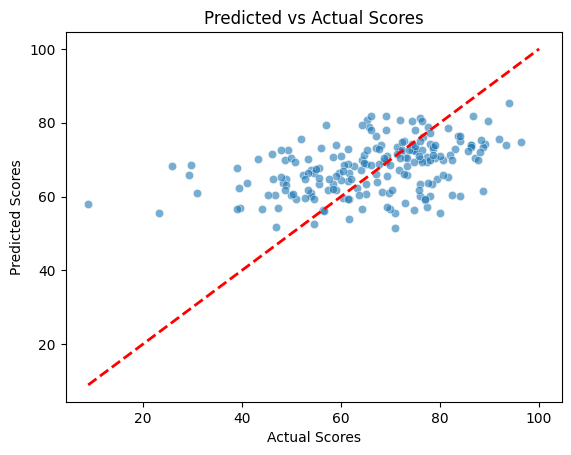

In [52]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.title('Predicted vs Actual Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

Text(0.5, 1.0, 'Feature Coefficients (Influence)')

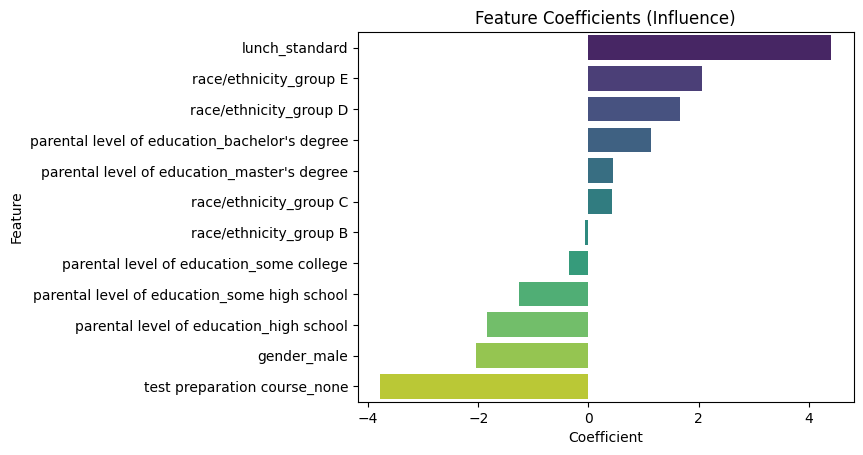

In [53]:
sns.barplot(x='Coefficient', y='Feature', data=coef_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Coefficients (Influence)')

Nitheeswaran M 24BAD079


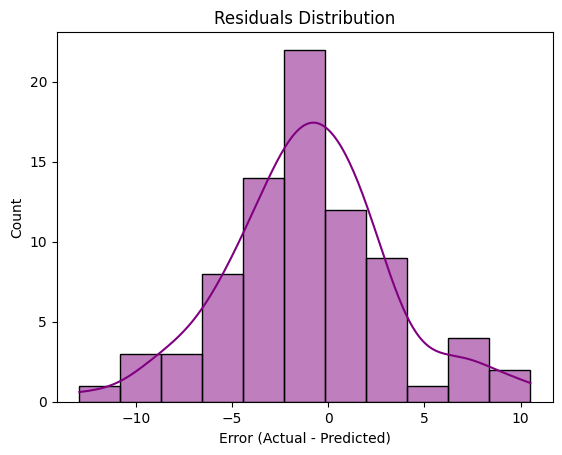

In [68]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Error (Actual - Predicted)')
print("Nitheeswaran M 24BAD079")

**Scenario 2**

In [55]:
df1=pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [57]:
df1.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [58]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [59]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [60]:
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1 = df1.dropna(subset=['horsepower'])

In [61]:
X = df1[['horsepower']]
y = df1['mpg']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {}
degrees = [2, 3, 4]

In [63]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_range_poly = poly.transform(X_range)

    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    X_range_poly_scaled = scaler.transform(X_range_poly)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)

    y_pred = model.predict(X_test_poly_scaled)
    y_curve = model.predict(X_range_poly_scaled) 

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{d:<10} {rmse:.4f}     {r2:.4f}")
    results[d] = {'RMSE': rmse, 'R2': r2}

2          4.2915     0.6392
3          4.2965     0.6383
4          4.2741     0.6421


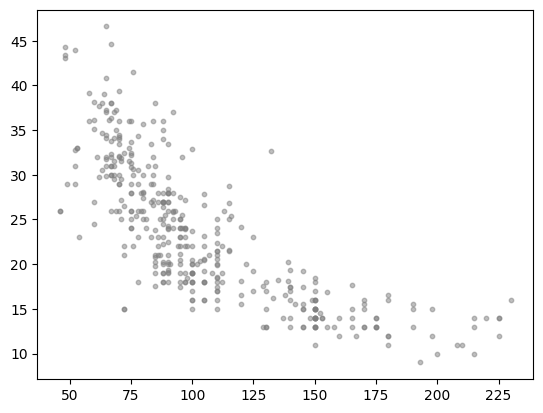

In [64]:
plt.scatter(X, y, color='gray', s=10, alpha=0.5, label='Actual Data')

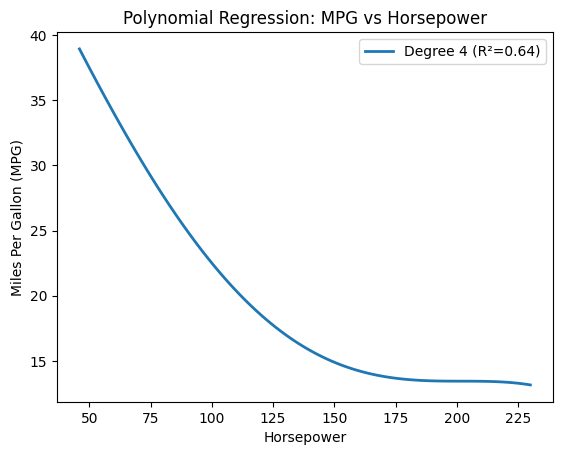

In [65]:
plt.plot(X_range, y_curve, linewidth=2, label=f'Degree {d} (R²={r2:.2f})')

plt.title('Polynomial Regression: MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()

In [66]:
poly_4 = PolynomialFeatures(degree=4)
X_train_p4 = poly_4.fit_transform(X_train)
X_test_p4 = poly_4.transform(X_test)

scaler_4 = StandardScaler()
X_train_p4_sc = scaler_4.fit_transform(X_train_p4)
X_test_p4_sc = scaler_4.transform(X_test_p4)

ridge = Ridge(alpha=10)
ridge.fit(X_train_p4_sc, y_train)
ridge_pred = ridge.predict(X_test_p4_sc)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge (Deg 4) {np.sqrt(mean_squared_error(y_test, ridge_pred)):.4f}     {ridge_r2:.4f}")

Ridge (Deg 4) 4.2763     0.6417


Nitheeswaran M 24BAD079


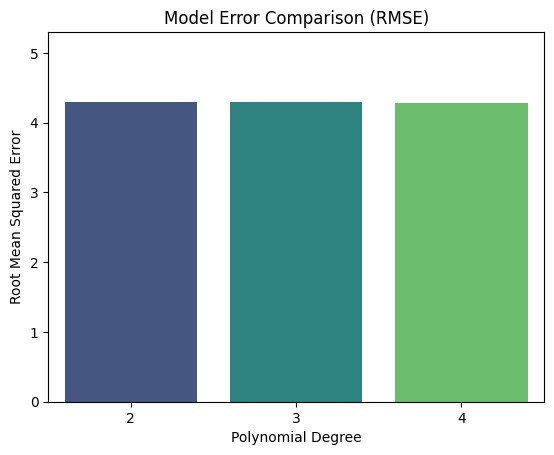

In [67]:
degrees_list = list(results.keys())
rmse_list = [results[d]['RMSE'] for d in degrees_list]

sns.barplot(x=degrees_list, y=rmse_list, palette="viridis")
plt.title('Model Error Comparison (RMSE)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.ylim(0, max(rmse_list) + 1)
print("Nitheeswaran M 24BAD079")